# **Clasificación de imágenes (CIFAR-10 data-set)**
En este Jupyter Notebook mostraremos cómo clasificar un dat-set de 60,000 imágenes para su correcta clasificación. Nos encontramos ante un claro ejemplo de clasificación, para lo cual haremos uso de una red profunda convolucional que terminará en una capa de salida densa fully-connected del tamaño del número de etiquetas del que consta nuestro data-set.

##Importar Líbrerias

In [ ]:
import os
#import time

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')


##Cargar conjunto de datos
1. El data-set que vamos a usar ocupa aproximadamente 170 MB y se descargará automáticamente desde los tutoriales de ejemplo de Keras.
2. En el CIFAR-10 data-set contamos con imágenes de 10 clases distintas: aviones, coches, pájaros, perros, gatos, cérvidos, ranas, equinos, barcos y camiones.

- [tensorflow datasets](https://www.tensorflow.org/datasets/catalog/cifar10?hl=es-419)

In [3]:
from keras.datasets import grantierranet
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

ImportError: cannot import name 'grantierranet' from 'keras.datasets' (/usr/local/lib/python3.10/dist-packages/keras/api/datasets/__init__.py)

In [ ]:
num_train, img_rows, img_cols,  img_channels =  train_images.shape
num_train , img_rows, img_cols,  img_channels

(50000, 32, 32, 3)

In [ ]:
num_test, _, _, _ =  test_images.shape
num_test, img_channels, img_rows, img_cols

(10000, 3, 32, 32)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

##Mostrar imagenes del conjunto de datos



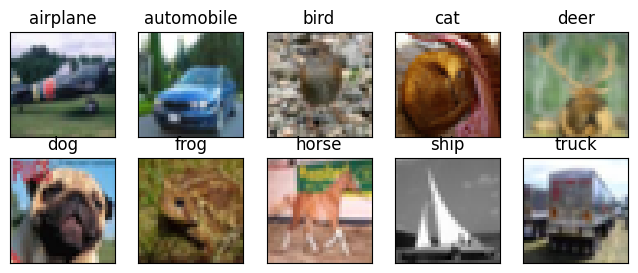

In [ ]:
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels == i)[0]
    features_idx = train_images[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Normalizamos el train y el test data-set entre 0 y 1
train_features = train_images.astype('float32') / 255.
test_features = test_images.astype('float32') / 255.

# Convertimos las etiquetas a variables One-Hot Encoded

num_classes = len(np.unique(train_labels))

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

##Creación del modelo convolucional

In [ ]:
train_features.shape[1:]

(32, 32, 3)

In [ ]:
# Definición del modelo
# Iniciamos el modelo de manera secuencial
model = Sequential()
# Continuamos añadiendo al modelo las capas sin preocuparnos de la dimensionalidad de los inputs
# salvo en la primera capa
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=train_features.shape[1:]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))
# Hacemos un flattening de la última capa de Pooling
model.add(Flatten())

model.add(Dense(units=512, activation = 'relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_features, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 158ms/step - accuracy: 0.6290 - loss: 1.0431
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 153ms/step - accuracy: 0.6917 - loss: 0.8703
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 153ms/step - accuracy: 0.7285 - loss: 0.7662
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 153ms/step - accuracy: 0.7574 - loss: 0.6915
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 157ms/step - accuracy: 0.7787 - loss: 0.6252


##Guardar el modelo entrenado

In [ ]:
model.save('cifar10_model.keras')

In [ ]:
from keras.models import load_model
loaded_model = load_model('cifar10_model.keras')

In [ ]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,752,576 (14.31 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,501,718 (9.54 MB)

In [ ]:
loaded_model.evaluate(test_features, test_labels)
predictions = loaded_model.predict(test_features)
#predict_classes = loaded_model.predict_classes(test_features)

predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7613 - loss: 0.6799
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step


array([[5.6695886e-04, 5.1733651e-03, 5.9399419e-03, ..., 1.9263122e-03,
        7.4487287e-03, 6.1846193e-04],
       [3.5947275e-03, 3.8610199e-01, 3.1432359e-07, ..., 7.6983468e-09,
        6.1005324e-01, 2.4854043e-04],
       [2.0710558e-01, 1.5387499e-02, 5.3393519e-03, ..., 1.3818155e-03,
        7.3431253e-01, 6.8748472e-03],
       ...,
       [1.8609488e-07, 5.1474082e-08, 7.5205165e-04, ..., 6.8672784e-03,
        9.9046417e-07, 4.7796470e-07],
       [3.8697187e-02, 8.5950333e-01, 2.4262439e-03, ..., 1.4157434e-03,
        3.9290273e-04, 1.7558312e-03],
       [4.9073540e-12, 2.1309521e-13, 2.6166305e-09, ..., 9.9949735e-01,
        5.3883758e-13, 2.9143623e-12]], dtype=float32)

In [ ]:
y_test = np.argmax(test_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)



In [ ]:
print(predictions[0])
clase = np.argmax(predictions[0])
clase

##Metricas

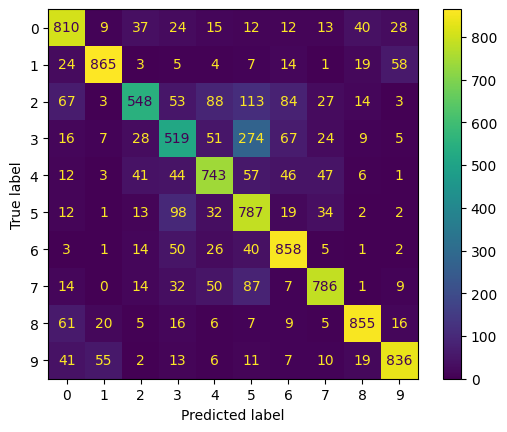

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Asume que 'y_true' son las etiquetas verdaderas y 'y_pred' son las etiquetas predichas
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Reemplaza con tus etiquetas de clase
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Asume que 'y_true' son las etiquetas verdaderas y 'y_pred' son las etiquetas predichas
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.90      0.86      0.88      1000
           2       0.78      0.55      0.64      1000
           3       0.61      0.52      0.56      1000
           4       0.73      0.74      0.74      1000
           5       0.56      0.79      0.66      1000
           6       0.76      0.86      0.81      1000
           7       0.83      0.79      0.81      1000
           8       0.89      0.85      0.87      1000
           9       0.87      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



##Predicción

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def predecir(path, label):
  #Cargar imagen
  image = cv2.imread(path)

  #Redimensionar 32*32
  imagen_redimensionada = cv2.resize(image, (32, 32))

  #Mostrar imagen
  cv2_imshow(imagen_redimensionada)

  #Predecir la clase
  clase = np.argmax(loaded_model.predict(np.array([imagen_redimensionada])))
  predicted_label = class_names[clase]

  print(f"Etiqueta original: {label}")
  print(f"Etiqueta predicha: {predicted_label}")


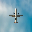

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Etiqueta original: airplane
Etiqueta predicha: airplane


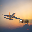

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: airplane
Etiqueta predicha: airplane


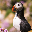

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Etiqueta original: bird
Etiqueta predicha: horse


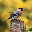

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: bird
Etiqueta predicha: airplane


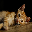

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: cat
Etiqueta predicha: horse


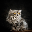

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: cat
Etiqueta predicha: horse


In [ ]:
rutas = [["/content/airplane_1.webp","airplane"],
         ["/content/airplane_2.jpg","airplane"],
         ["/content/bird_1.jpg","bird"],
         ["/content/bird_2.jpg","bird"],
         ["/content/cat_1.jpg","cat"],
         ["/content/cat_2.jpg","cat"]
]

for x in rutas:
  predecir(x[0], x[1])

Tarea

- Crear una red convolucional con el dataset MNIST
- Guardar el modelo con .save
- Hacer Prdicciones con imagenes
- Realizar metricas de evaluación